#### Importing the necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])


In [4]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [5]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")


Finished training the model


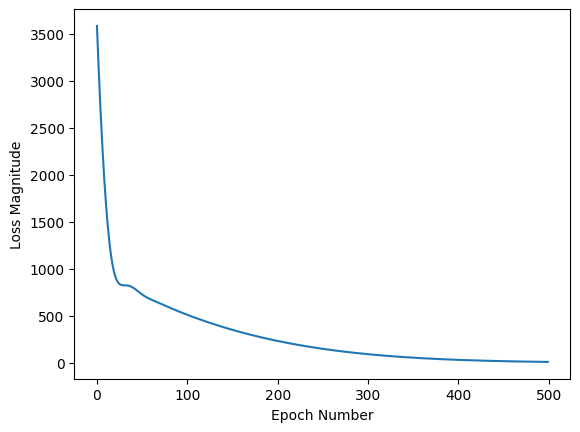

In [6]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [7]:
print(model.predict([100]))

1/1 [==============================] - 0s 96ms/step
[[211.31628]]


Ok, now then write a linear regression problem for "How does advertising spending affect revenue for a business by generation some synthetic data that simulates the relationship between advertising spending and sales revenue for a business".

Problem Statement:
A company wants to understand how its advertising spending impacts its sales revenue. They collect data on advertising expenditures (in dollars) and corresponding sales revenue (in thousands of dollars) for a set of months. The goal is to build a linear regression model that predicts sales revenue based on advertising spending.

spending_on_advertising (X): The amount spent on advertising during a specific month (in dollars).
sales_revenue(Y): The total sales revenue generated during the same month (in thousands of dollars).

Task:
Build a linear regression model to predict sales revenue based on advertising spending.
Calculate the regression coefficients (slope and intercept).
Evaluate the model’s performance using appropriate metrics (e.g., mean squared error, R-squared).

Questions:
What is the estimated relationship between advertising spending and sales revenue?
How much additional sales revenue can be expected for every $100 increase in advertising spending?

In [8]:
#Generate synthetic data
''' 
I created a dataset with 300 observations.
The advertising spending values were randomly generated between 0 and 1000 in dollars.
The sales revenue was calculated using the formula: Revenue = 100 + 0.5 × spending_on_advertising     + ε, 
where ε represents random noise with a normal distribution (mean = 0, standard deviation = 50).
'''
np.random.seed(123) ## assign seed number to get the exact random values whenever we run

no_of_observation=300
spending_on_advertising=np.random.uniform(0,1000,no_of_observation)
sales_revenue= 100 + 0.5*spending_on_advertising +np.random.normal(0,50,no_of_observation)

In [9]:
#Create DataFrame
advert_to_revenue=pd.DataFrame({"Advertising_cost":spending_on_advertising,
                                "Revenue":sales_revenue})
advert_to_revenue

,Advertising_cost,Revenue
0,696.469186,470.028381
1,286.139335,227.121818
2,226.851454,244.950128
3,551.314769,268.032712
4,719.468970,386.478674
...,...,...
295,940.029015,601.611922
296,832.716197,460.606101
297,846.054838,450.493262
298,123.923010,138.334975


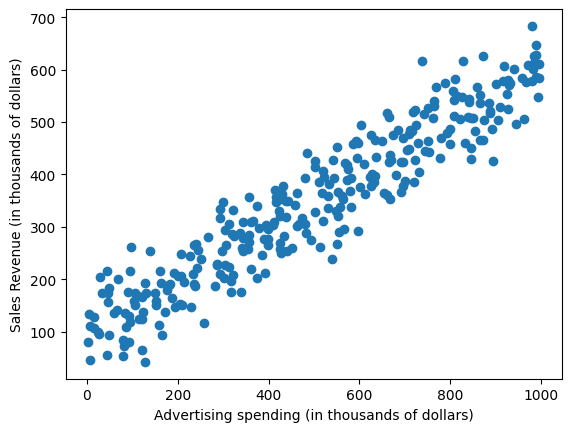

In [10]:
#Plot the graph of relationship between spending on advertistments to sales revenue
plt.scatter(spending_on_advertising,sales_revenue)
plt.xlabel("Advertising spending (in thousands of dollars)")
plt.ylabel("Sales Revenue (in thousands of dollars)")
plt.show()  

In [11]:
# Build a linear regression model
X = advert_to_revenue[["Advertising_cost"]]
y = advert_to_revenue["Revenue"]
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
# Get regression coefficients
slope = model.coef_[0]
intercept = model.intercept_

In [13]:
# Evaluate model performance
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [14]:
print(f"Regression Coefficients:")
print(f"Slope (Estimated impact of advertising spending on revenue): {slope:.2f}")
print(f"Intercept (Revenue when spending on advertising is zero): {intercept:.2f}\n")
print(f"Model Performance:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Regression Coefficients:
Slope (Estimated impact of advertising spending on revenue): 0.50
Intercept (Revenue when spending on advertising is zero): 95.92

Model Performance:
Mean Squared Error (MSE): 2415.98
R-squared (R2): 0.89


After running the regression model, the following results are obtained:

### Regression Coefficients:

**Slope** (Estimated impact of advertising spending on revenue): The slope coefficient of 0.50 indicates that for every unit increase in advertising spending, the revenue is estimated to increase by 0.50 units (assuming all other factors remain constant).

**Intercept** (Revenue when spending on advertising is zero): The intercept value of 95.92 represents the estimated revenue when there is no spending on advertising. It’s the baseline revenue before considering any advertising effects.

### Model Performance:

**Mean Squared Error (MSE)**: The MSE of 2415.98 measures the average squared difference between the actual revenue values and the predicted revenue values by the model. Lower MSE values indicate better model performance.

**R-squared (R2)**: The R-squared value of 0.89 indicates that approximately 89% of the variability in revenue can be explained by the advertising spending. A higher R2 value suggests a better fit of the model to the data.

In summary, the regression model suggests that advertising spending has a positive impact on revenue, and the model performs well in explaining the variability in revenue based on the given data. Keep in mind that these results are based on the assumptions and limitations of the regression analysis. 